In [1]:
import face_recognition
import argparse
import numpy as np
import os.path
import cv2 

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [2]:
img_path = 'E01_C5.jpg'
image = face_recognition.load_image_file(img_path)
face_locations = face_recognition.face_locations(image, model = 'cnn')
face_locations

[(192, 563, 415, 340)]

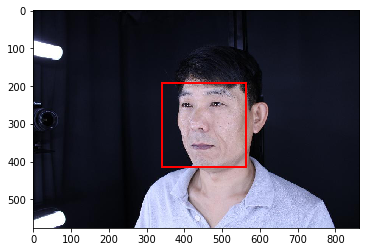

In [17]:
for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img)

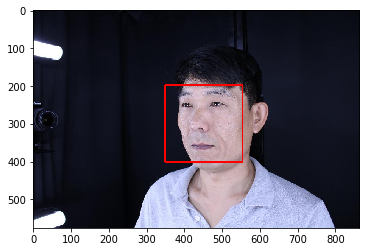

In [21]:
img = cv2.imread(img_path, 1)
copy_img = img.copy()

face_locations = face_recognition.face_locations(img, model='cnn')

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  


crop_img = copy_img[top:bottom, left:right]
resize_img = cv2.resize(crop_img, dsize=(112,112), interpolation = cv2.INTER_AREA)
imshow('', resize_img)


In [11]:
old_dir = 'data/k-face/new_path/select_train'
new_dir = 'data/k-face/new_path/train_align_112'

In [12]:
old_dir_list = os.listdir(old_dir)
len(old_dir_list)

400

In [ ]:
for root, dirs, files in os.walk(old_dir):
#     print(dirs)
    people_name = os.path.split(root)[1]
    print(people_name)
    new_people_dir = os.path.join(new_dir, people_name)
    try:
        os.mkdir(new_people_dir)
    except Exception as err:
        print(err)
        
    # face recognition and  save	
    for i, file in enumerate(files):
        input_image_path = os.path.join(root, file)
        original_image = cv2.imread(input_image_path, 1)
        if original_image is not None:
            original_image= cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            copy_image = original_image
            face_locations = face_recognition.face_locations(original_image)

            for face_location in face_locations:
                # more bigger box size than ordinary box
                top, right, bottom, left = face_location
                top -= 30
                right += 30
                bottom +=30
                left -=30
                
                crop_image = copy_image[top:bottom, left:right]
                resize_image = cv2.resize(crop_image, dsize=(112,112), interpolation = cv2.INTER_AREA)
                resize_image = cv2.cvtColor(resize_image, cv2.COLOR_RGB2BGR)
                save_path = f"{new_dir}/{people_name}/{i}.jpeg"
                cv2.imwrite(save_path, resize_image)
            

select_train
19092732
